## Parsing Single Images
This notebook is an example setup to explore and parse single images generated from a PDF. It will highlight the basic methods used to process table structures in PDF files, with the Minnesota Medicaid Preferred Drug List PDF as an example.

In [1]:
from pdlparser.utils import generate_image
import matplotlib.pyplot as plt

In [2]:
img = generate_image(
    './data/preferred-drug-list-2021-10-01_tcm1053-499882.pdf', 
    page=2 # can specificy multiple pages using [2, 4]
)

## Img Object
The img object is a PIL image. A PIL Image can be shown with img.show(), but it can also be manipulated as a simple array. This becomes useful when leveraging matplotlib.

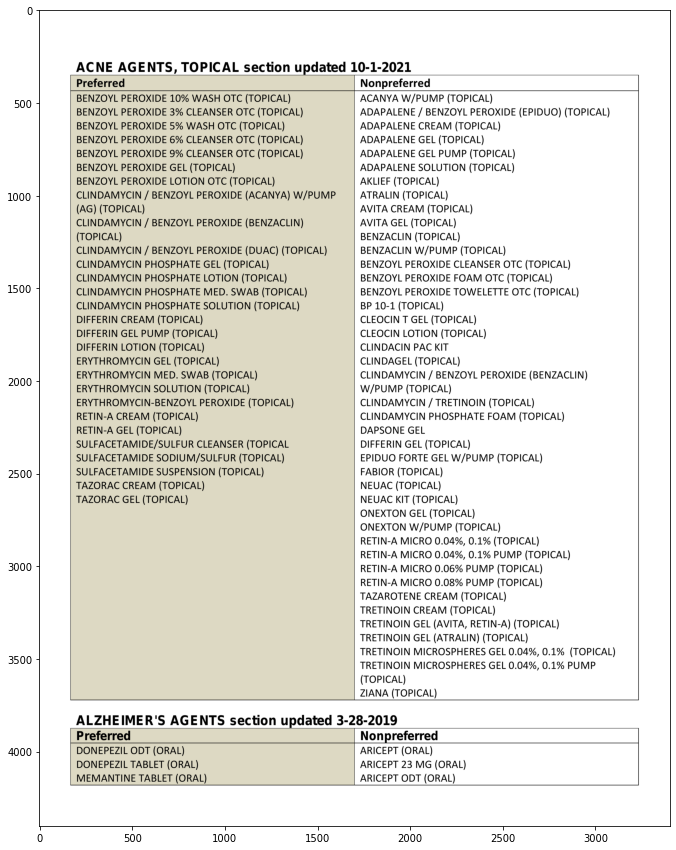

In [3]:
fig = plt.figure()
fig.set_size_inches(15,15)
plt.imshow(img)

## Parsing Table Structure
To parse tables in a PDF three methods are used to find table contours (rectangles) and parse those recontours into a defined dict for later text extraction.

In [4]:
from pdlparser.images import generate_contours, parse_contours, parse_class_contours

In [5]:
contours = generate_contours(img)
outer_rects, inner_rects = parse_contours(contours)
class_groups = parse_class_contours(outer_rects, inner_rects)

## Class Groups
The resulting class_groups array is a list of dictionaries representing specific table contours or rectanges

In [6]:
class_groups

[{'left': [(173, 354, 1526, 80), (173, 439, 1526, 3280)],
  'right': [(1703, 354, 1526, 80), (1703, 439, 1526, 3280)],
  'header': (168, 249, 3067, 100),
  'content_box': (168, 349, 3067, 3376)},
 {'left': [(173, 3876, 1526, 75), (173, 3956, 1526, 222)],
  'right': [(1703, 3876, 1526, 75), (1703, 3956, 1526, 222)],
  'header': (168, 3771, 3067, 100),
  'content_box': (168, 3871, 3067, 313)}]

## Show Class Group Image Contours
A utility method can be used to display the parsed contours and class_groups

In [7]:
from pdlparser.utils import show_class_groups

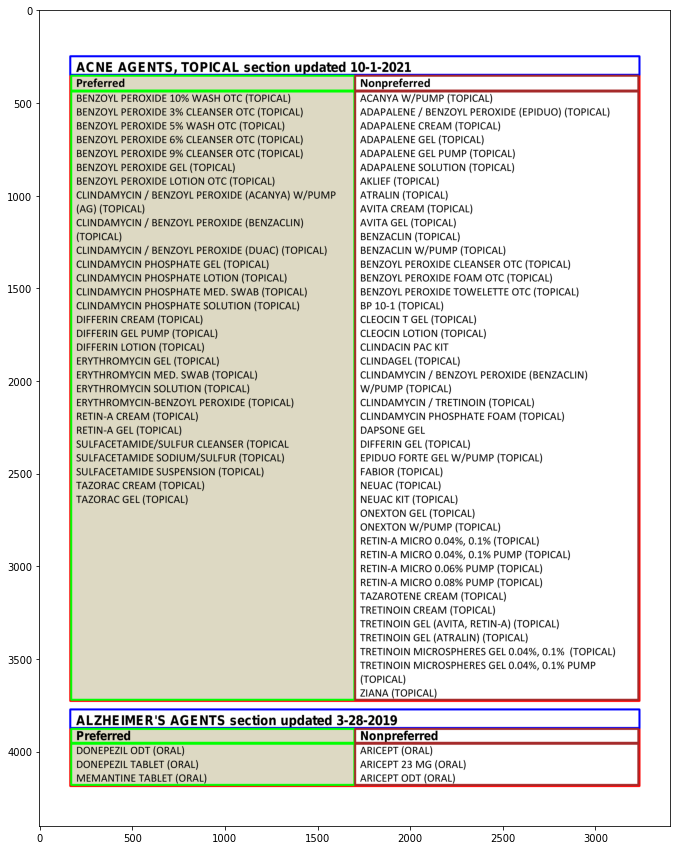

In [8]:
adj_img = show_class_groups(class_groups, img)
fig = plt.figure()
fig.set_size_inches(15,15)
plt.imshow(adj_img)

## Extracting Text data
Lastly, using the class_group dict we can parse each table element into a dictionary

In [9]:
from pdlparser.images import get_data

In [10]:
data = get_data(img)

In [11]:
data

[{'header': ['ACNE AGENTS, TOPICAL section updated 10-1-2021'],
  'preferred': ['BENZOYL PEROXIDE 10% WASH OTC (TOPICAL)',
   'BENZOYL PEROXIDE 3% CLEANSER OTC (TOPICAL)',
   'BENZOYL PEROXIDE 5% WASH OTC (TOPICAL)',
   'BENZOYL PEROXIDE 6% CLEANSER OTC (TOPICAL)',
   'BENZOYL PEROXIDE 9% CLEANSER OTC (TOPICAL)',
   'BENZOYL PEROXIDE GEL (TOPICAL)',
   'BENZOYL PEROXIDE LOTION OTC (TOPICAL)',
   'CLINDAMYCIN / BENZOYL PEROXIDE (ACANYA) W/PUMP',
   '(AG) (TOPICAL)',
   'CLINDAMYCIN / BENZOYL PEROXIDE (BENZACLIN)',
   '(TOPICAL)',
   'CLINDAMYCIN / BENZOYL PEROXIDE (DUAC) (TOPICAL)',
   'CLINDAMYCIN PHOSPHATE GEL (TOPICAL)',
   'CLINDAMYCIN PHOSPHATE LOTION (TOPICAL)',
   'CLINDAMYCIN PHOSPHATE MED. SWAB (TOPICAL)',
   'CLINDAMYCIN PHOSPHATE SOLUTION (TOPICAL)',
   'DIFFERIN CREAM (TOPICAL)',
   'DIFFERIN GEL PUMP (TOPICAL)',
   'DIFFERIN LOTION (TOPICAL)',
   'ERYTHROMYCIN GEL (TOPICAL)',
   'ERYTHROMYCIN MED. SWAB (TOPICAL)',
   'ERYTHROMYCIN SOLUTION (TOPICAL)',
   'ERYTHROMYCIN-BENZO